In [ ]:
# Exercise 1
# Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?
from scipy.stats import binom

n = 10  # number of quanta
p = 0.2 # probability of release

for k in range(n + 1):
  prob = binom.pmf(k, n, p)
  print(f"Probability of {k} quanta released: {prob:.4f}")

Probability of 0 quanta released: 0.1074
Probability of 1 quanta released: 0.2684
Probability of 2 quanta released: 0.3020
Probability of 3 quanta released: 0.2013
Probability of 4 quanta released: 0.0881
Probability of 5 quanta released: 0.0264
Probability of 6 quanta released: 0.0055
Probability of 7 quanta released: 0.0008
Probability of 8 quanta released: 0.0001
Probability of 9 quanta released: 0.0000
Probability of 10 quanta released: 0.0000


In [10]:
# Exercise 2
from scipy.stats import binom

# Number of quanta and the observed release count
n = 14  # number of quanta
k = 8   # number of quanta released

# Probability of release for each quanta
p = 0.1  # 10% probability of release

# Calculate the probability of getting exactly 8 successes in 10 trials
probability = binom.pmf(k, n, p)

# Print the probability of getting exactly 8 successes in 10 trials
print(f"Probability of getting exactly {k} quanta released: {probability:}")

# Define the range of probabilities to test
probabilities = [0.1 * i for i in range(1, 11)]  # from 0.1 to 1.0 in steps of 0.1

# Dictionary to hold the probabilities of getting exactly k releases
probability_distribution = {}

for p in probabilities:
    # Calculate the probability of getting exactly k successes in n trials
    probability = binom.pmf(k, n, p)
    probability_distribution[p] = probability

# Print out the probabilities for each release probability
print("Release Probability")
print("*")
for p, prob in probability_distribution.items():
    print(f"{p:.2f} | {prob:.4f}")

# Find the probability with the highest value
most_probable_p = max(probability_distribution, key=probability_distribution.get)
most_probable_value = probability_distribution[most_probable_p]

print(f"Most probable release probability given the measurement: {most_probable_p:.2f}")
print(f"Probability: {most_probable_value:.4f}")


Probability of getting exactly 8 quanta released: 1.5959173230000027e-05
Release Probability
*
0.10 | 0.0000
0.20 | 0.0020
0.30 | 0.0232
0.40 | 0.0918
0.50 | 0.1833
0.60 | 0.2066
0.70 | 0.1262
0.80 | 0.0322
0.90 | 0.0013
1.00 | 0.0000
Most probable release probability given the measurement: 0.60
Probability: 0.2066


In [19]:
# Exercise 3
from scipy.stats import binom
import numpy as np

# Variables
n = 14  # number of quanta
p = 0.1  # assumed release probability
k1 = 8  # number of quanta released in the first experiment
k2 = 5  # number of quanta released in the second experiment

# Likelihood for each experiment alone
likelihood1 = binom.pmf(k1, n, p)
likelihood2 = binom.pmf(k2, n, p)

# Product of individual likelihoods
total_likelihood = likelihood1 * likelihood2

# Compute log-likelihoods
log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)

# Total log-likelihood
total_log_likelihood = log_likelihood1 + log_likelihood2

# Results
print(f"Likelihood of observing {k1} quanta released: {likelihood1}")
print(f"Likelihood of observing {k2} quanta released: {likelihood2:.6f}")
print(f"Total likelihood: {total_likelihood}")
print(f"Total log-likelihood: {total_log_likelihood:.2f}")

# Compute likelihood and log-likelihood for p in range (0, 1.1, 0.1)
p_values = np.arange(0, 1.1, 0.1)
for p in p_values:
    likelihood = binom.pmf(k1, n, p) * binom.pmf(k2, n, p)
    print(f"Likelihood for p={p}: {likelihood}")
    log_likelihood = np.log(likelihood)
    print(f"Log-likelihood for p={p}: {log_likelihood}")

# Maximum value
print ("Maximum value: likelihood: p=0.5;0.022, log-likelihood;p=0.5;-3.79")


Likelihood of observing 8 quanta released: 1.5959173230000027e-05
Likelihood of observing 5 quanta released: 0.007756
Total likelihood: 1.2378187214998254e-07
Total log-likelihood: -15.90
Likelihood for p=0.0: 0.0
Log-likelihood for p=0.0: -inf
Likelihood for p=0.1: 1.2378187214998254e-07
Log-likelihood for p=0.1: -15.90474491593149
Likelihood for p=0.2: 0.0001732842750806352
Log-likelihood for p=0.2: -8.660577103497953
Likelihood for p=0.30000000000000004: 0.00455057542282908
Log-likelihood for p=0.30000000000000004: -5.392501587459657
Likelihood for p=0.4: 0.01897003133922153
Log-likelihood for p=0.4: -3.9648948429953808
Likelihood for p=0.5: 0.022396467626094804
Log-likelihood for p=0.5: -3.798852027819973
Likelihood for p=0.6000000000000001: 0.00843112503965401
Log-likelihood for p=0.6000000000000001: -4.7758250592117095
Likelihood for p=0.7000000000000001: 0.0008358199756216637
Log-likelihood for p=0.7000000000000001: -7.087097308234069
Likelihood for p=0.8: 1.0830267192539667e-05

<ipython-input-19-aa4f8ddd946c>:36: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(likelihood)


In [28]:
# Exercise 4
# Data: Measured release and count
measured_releases = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0]
total_observations = 100
available_quanta = 14

# Calculate total releases
for i in range(len(measured_releases)):
    total_releases = sum([measured_releases[i] * counts[i] for i in range(len(measured_releases))])

# Calculate average releases per experiment
average_releases = total_releases / total_observations

# Calculate p-hat
p_hat = average_releases / available_quanta

# Print p-hat
print(f"Most likely value of p-hat: {p_hat:.2f}")

Most likely value of p-hat: 0.47


Estimated lambda (mean of Poisson distribution): 6.10


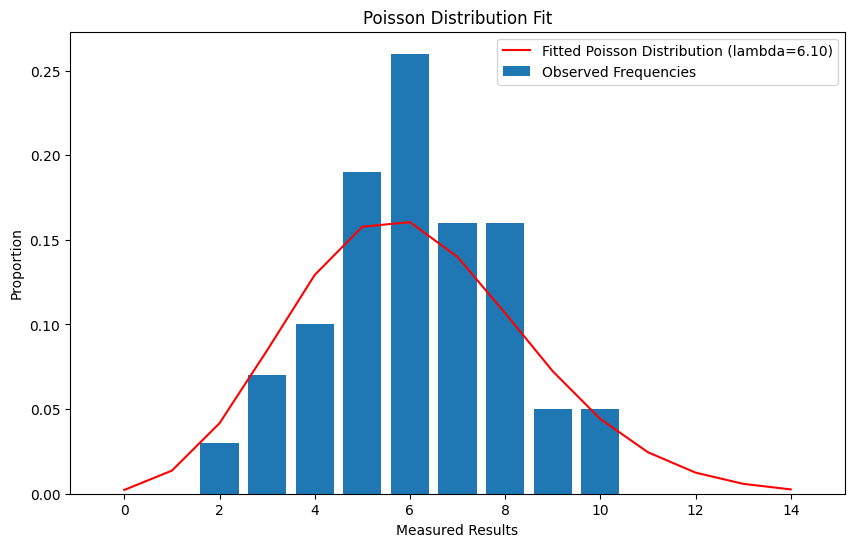

Most likely value of p-hat: 0.44


In [20]:
# Extra exercise 4
import numpy as np
from scipy.stats import poisson
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Data: Measured results
measured_results = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
counts = np.array([0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0])
total_observations = 100

# Define the negative log-likelihood
def negative_log_likelihood(lambda_):
    return -np.sum(counts * poisson.logpmf(measured_results, lambda_))

# Initial guess? Not really sure how right this is
initial_guess = np.mean(measured_results)

# Max likelihood
result = minimize(negative_log_likelihood, initial_guess, bounds=[(0, None)])
lambda_hat = result.x[0]
print(f"Estimated lambda (mean of Poisson distribution): {lambda_hat:.2f}")

# Results plot
x = np.arange(0, max(measured_results) + 1)
plt.figure(figsize=(10, 6))
plt.bar(measured_results, counts / total_observations, label='Observed Frequencies')
plt.plot(x, poisson.pmf(x, lambda_hat), 'r-', label=f'Fitted Poisson Distribution (lambda={lambda_hat:.2f})')
plt.xlabel('Measured Results')
plt.ylabel('Proportion')
plt.title('Poisson Distribution Fit')
plt.legend()
plt.show()

# Most likely value of p-hat
p_hat = lambda_hat / max(measured_results)
print(f"Most likely value of p-hat: {p_hat:.2f}")


In [5]:
# Experiment 5
from scipy.stats import binom

# Experiment for release probability at higher temperature (p-hat)
Total_successes = 7
Total_available_quanta = 14
p = Total_successes / Total_available_quanta
print(f"Most likely value of p: {p:.2f}")

# Probability of getting 7 successes in 14 trials when p= 0.3 (null hypothesis)
n = 14  # total number of quanta
k = 7   # number of quanta released
p = 0.3  # release probability under the null hypothesis

# Calculate the probability
probability = binom.pmf(k, n, p)

print(f"Probability of getting exactly {k} quanta released (given null hypothesis): {probability:.4f}")

# Probability of obtaining the measurement given null hypothesis is false

# Variables
n = 14  # total number of quanta
k = 7  # number of quanta released
p = 0.3  # release probability under the null hypothesis

# Compute the p-value for observing 7 or more successes
p_value = binom.sf(k-1, n, p0)  # sf is the survival function, which is 1 - cdf

# Display the result
print(f"The p-value for observing 7 or more quantal events out of 14 is: {p_value:.4f}")
print("Cannot conclude that tempature had an effect given p>0.05")




Most likely value of p: 0.50
Probability of getting exactly 7 quanta released (given null hypothesis): 0.0618
The p-value for observing 7 or more quantal events out of 14 is: 0.0933
Cannot conclude that tempature had an effect given p>0.05
